In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("D:\happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Country and Region columns is nominal data. We dont need these for model building.
All the remaining columns have continuous data except Happiness Rank column.
Happiness Rank column is discrete data.

In [3]:
df.shape

(158, 12)

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Seems there are no nulls in all columns.Good to proceed.

In [7]:
#Statistical Summary
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Count is same in all the columns: 158 , means no NaN's.
Mean and S.D's of columns Standard Error, Trust(Government Corruption), Generosity seems close. We expect S.D to be as less as possible compared to mean. Otherwise, if S.D is close to mean , it implies the data is not clean, there's so much variance.
We dont need Happiness Rank column since its discrete data.

In [8]:
df = df.drop(columns=['Happiness Rank','Country','Region'])
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
df.shape

(158, 9)

# EDA- Exploratory Data Analysis:

Data Visualization:

Lets see how data is distributed for every column in our dataset:

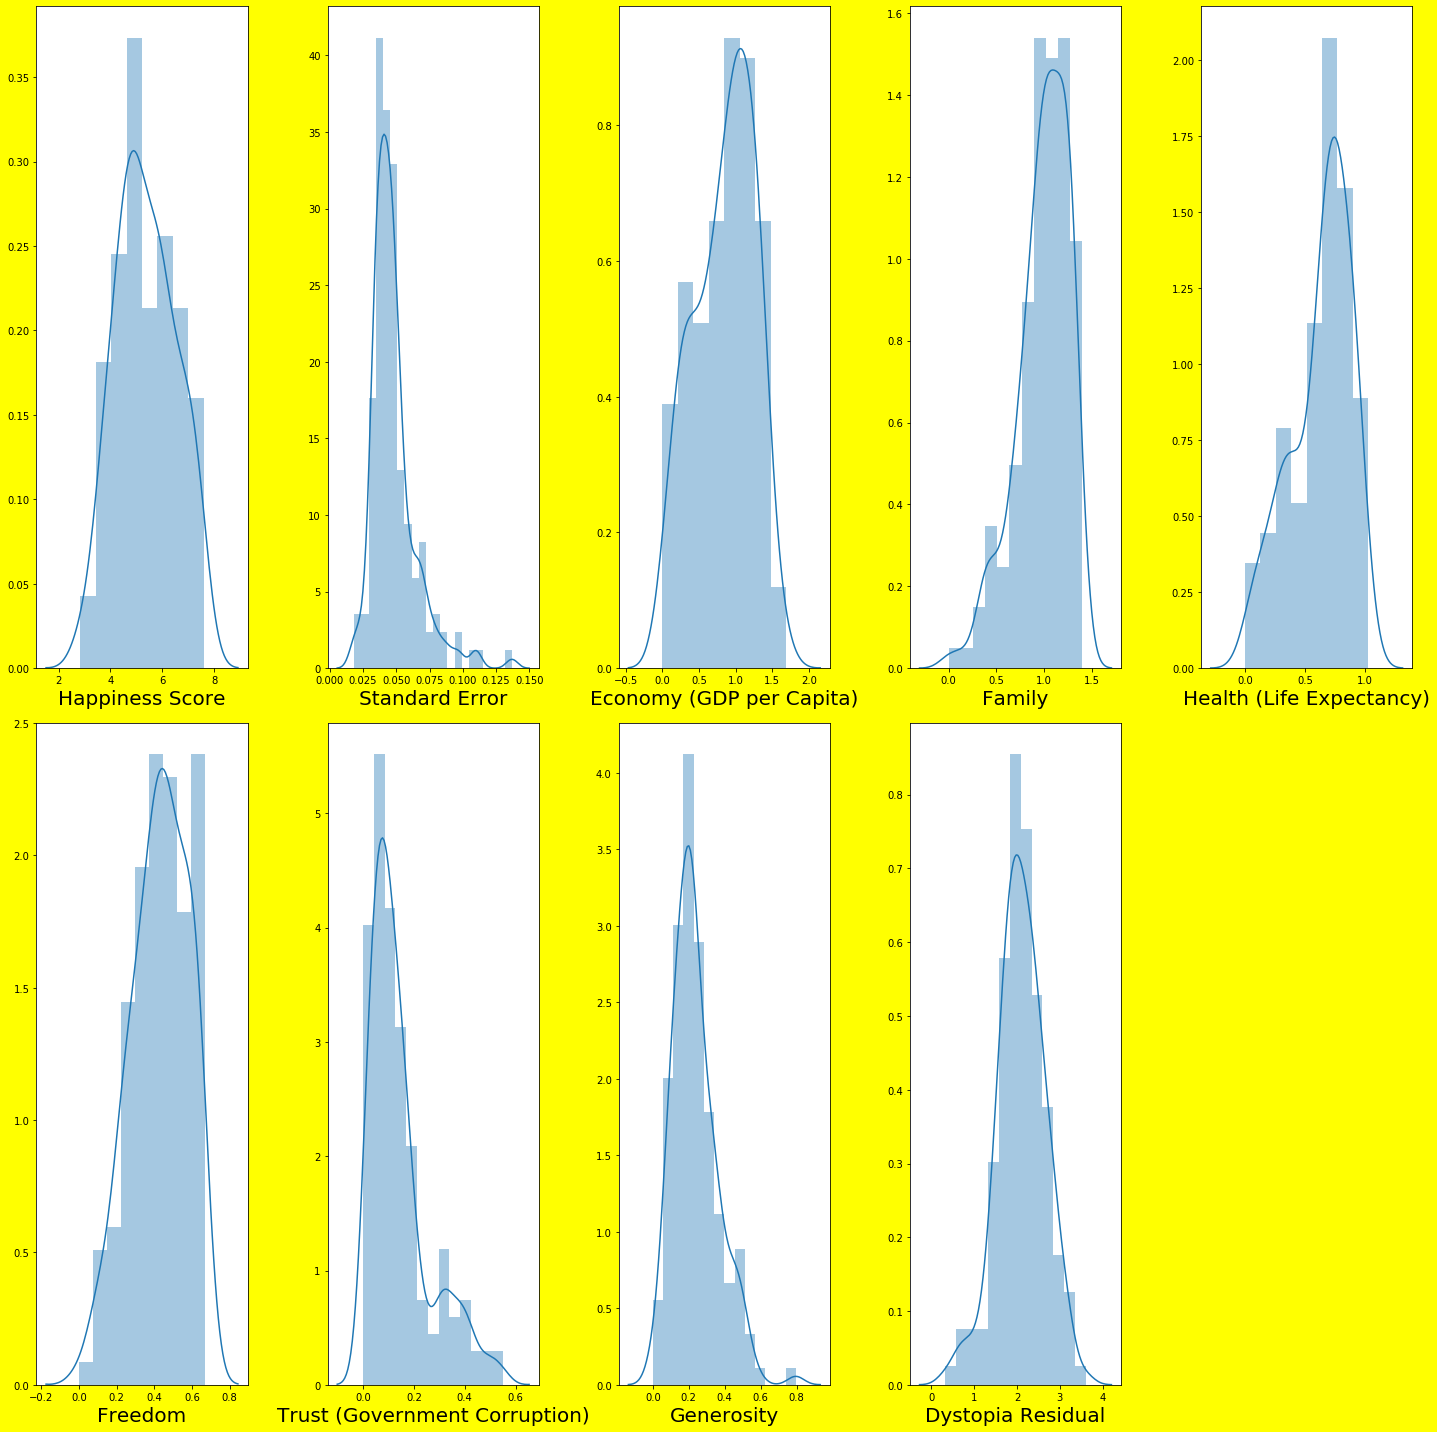

In [10]:
#Data distribution:
#Dist Plot:

plt.figure(figsize = (20,20), facecolor = 'yellow')
plotnumber = 1   #initializing 1 to a name

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(2,5,plotnumber) #In 2 rows I want 5 columns to be plotted 
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        plotnumber += 1
        plt.tight_layout()
        

We can see the columns Standard Error, Trust(Government Corruption), Generosity are skewed. We will remove the skewness in data cleaning part.

# Skewness:

In [11]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Skewness threshold is taken as: =/-0.50
Columns which are having skewness are:
                                     Standard Error
                                     Family
                                     Health (Life Expectancy) 
                                     Trust (Government Corruption)
                                     Generosity      

# Checking for the Outliers:

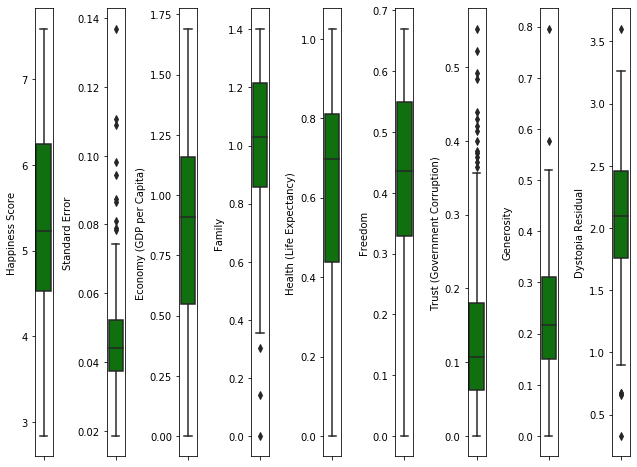

In [12]:
#BoxPlot:

collist = df.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]], color='green', orient='v')
    plt.tight_layout()

We see outliers in Standard Error, Family, Trust(Government Corruption), Generosity, Dystopia Residual.

In [13]:
def IQR_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[( (df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)) )]
    return df

In [14]:
IQR_outliers(df['Standard Error'])

39     0.09811
40     0.10895
62     0.07832
64     0.13693
93     0.07896
96     0.09438
100    0.08742
115    0.11068
125    0.08096
156    0.08658
Name: Standard Error, dtype: float64

In [15]:
index = np.where(IQR_outliers(df['Standard Error']) )
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(148, 9)


,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,10,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
1,11,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
2,12,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
3,13,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
4,14,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
...,...,...,...,...,...,...,...,...,...,...
143,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
144,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
145,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
146,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [16]:
IQR_outliers(df['Family'])

147    0.00000
157    0.13995
Name: Family, dtype: float64

In [17]:
index = np.where(IQR_outliers(df['Family']) )
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(147, 9)


,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,10,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
1,12,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
2,13,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
3,14,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
4,15,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001
...,...,...,...,...,...,...,...,...,...,...
142,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
143,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
144,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
145,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [18]:
IQR_outliers(df['Trust (Government Corruption)'])

16     0.37798
19     0.38583
20     0.32067
21     0.32524
23     0.49210
27     0.52208
34     0.32524
71     0.37124
90     0.39928
129    0.38331
153    0.55191
Name: Trust (Government Corruption), dtype: float64

In [19]:
index = np.where(IQR_outliers(df['Trust (Government Corruption)']) )
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(136, 9)


,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,22,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
1,23,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
2,24,6.786,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848
3,25,6.750,0.01848,1.32792,1.29937,0.89186,0.61477,0.21843,0.28214,2.11569
4,26,6.670,0.05800,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,2.67585
...,...,...,...,...,...,...,...,...,...,...
131,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
132,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
133,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
134,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [20]:
IQR_outliers(df['Generosity'])

33     0.57630
36     0.51752
73     0.51535
90     0.50318
128    0.79588
Name: Generosity, dtype: float64

In [21]:
index = np.where(IQR_outliers(df['Generosity']) )
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(131, 9)


,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,27,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
1,28,6.575,0.03512,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126
2,29,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
3,30,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
4,31,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
...,...,...,...,...,...,...,...,...,...,...
126,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
127,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
128,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
129,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [22]:
IQR_outliers(df['Dystopia Residual'])

71     0.65429
131    0.67108
153    0.67042
155    0.32858
Name: Dystopia Residual, dtype: float64

In [23]:
index = np.where(IQR_outliers(df['Dystopia Residual']) )
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(127, 9)


,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,31,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
1,32,6.477,0.05051,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401,2.85737
2,33,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
3,34,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
4,35,6.329,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367
...,...,...,...,...,...,...,...,...,...,...
122,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
123,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
124,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
125,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [24]:
#Percentage dataloss:
loss_percent = (158-127)/158*100
loss_percent

19.62025316455696

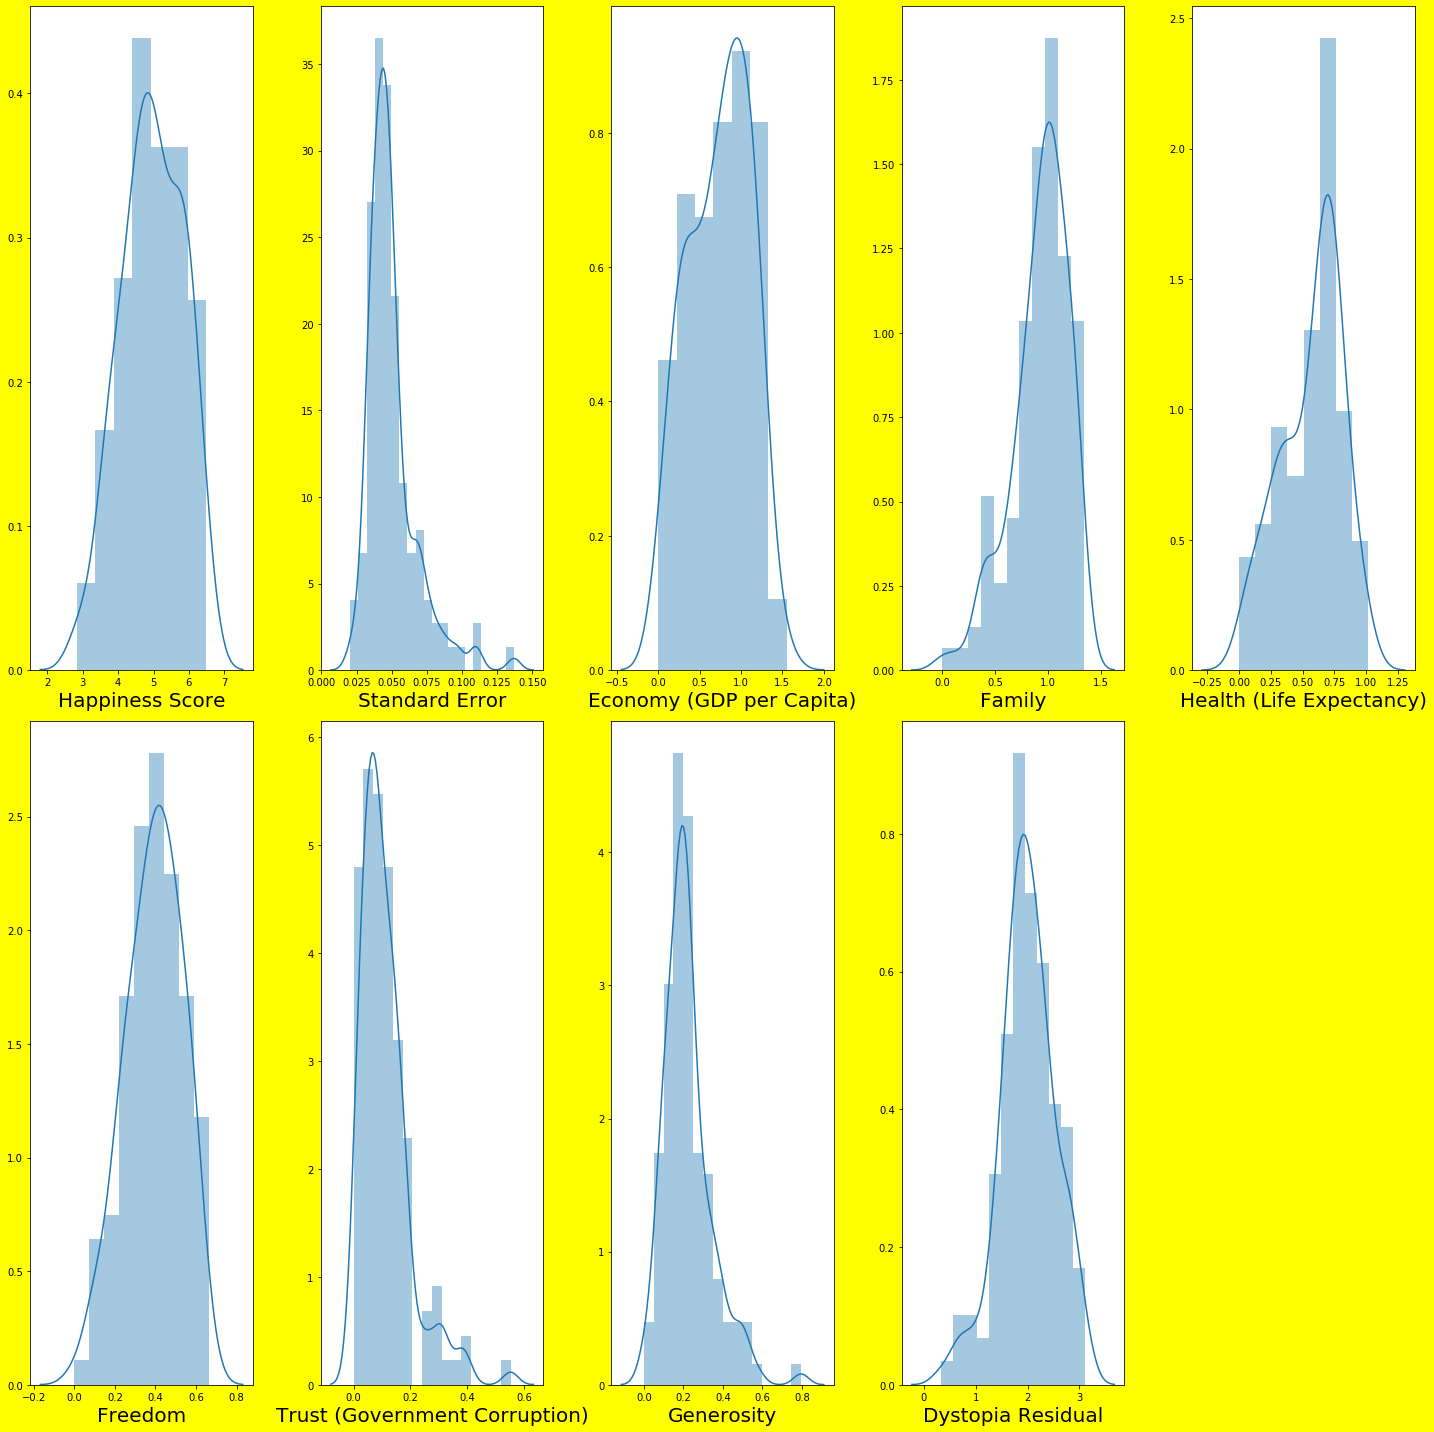

In [25]:
#Lets check if the skewness is handled or not after removing outliers:

#Data distribution of our features:
#Dist Plot:

plt.figure(figsize = (20,20), facecolor = 'yellow')
plotnumber = 1   #initializing 1 to a name

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(2,5,plotnumber) #In 2 rows I want 5 columns to be plotted 
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        plotnumber += 1
        plt.tight_layout()
        

Skewness Seems better after treating the outliers.

# Divide data into features and label before checking relationship and multicollinearity:

In [26]:

x = df.iloc[:, 1:]
y = df.iloc[:,:1]

x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
31,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
32,0.05051,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401,2.85737
33,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
34,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
35,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [27]:
y

,Happiness Score
31,6.485
32,6.477
33,6.455
34,6.411
35,6.329
...,...
153,3.465
154,3.340
155,3.006
156,2.905


# Correlation

# Visualizing relationship between features and label

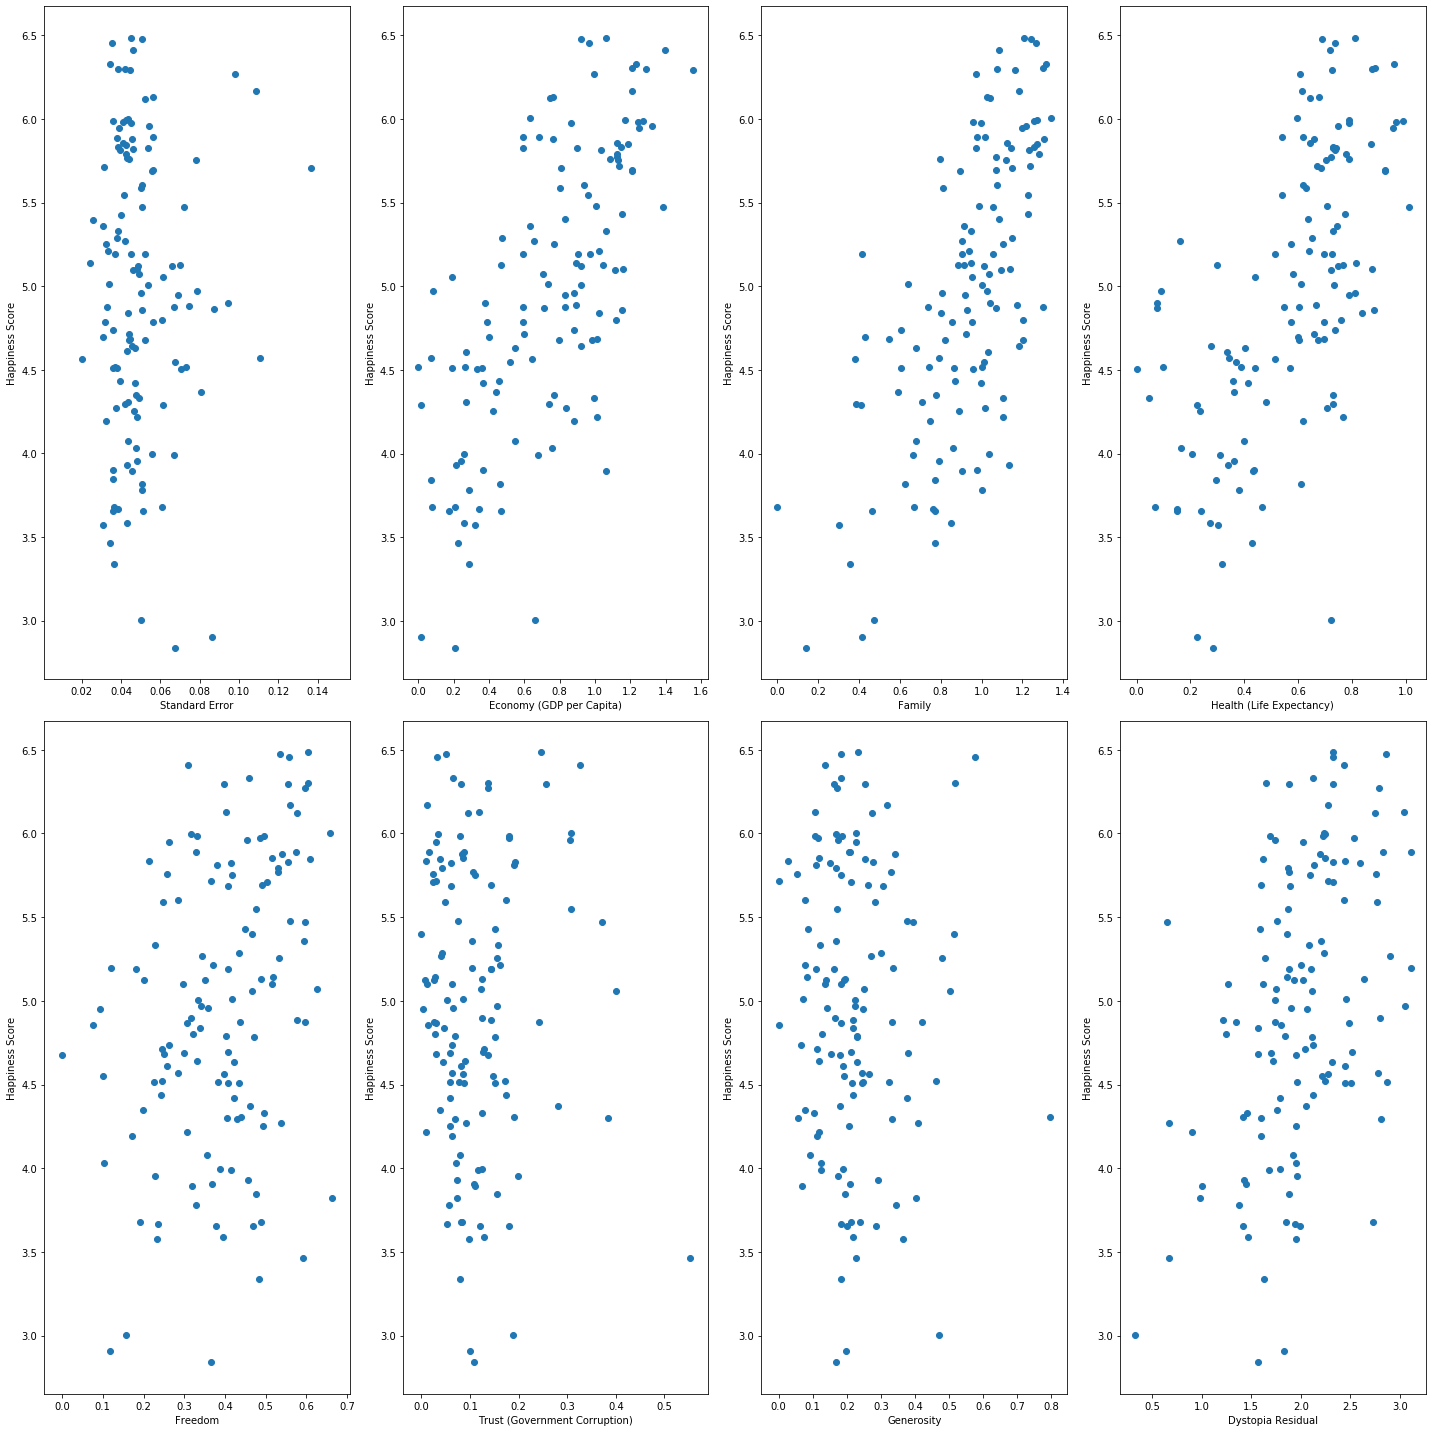

In [28]:
#Scatter plot finds relationship between x and y.

plt.figure(figsize = (20,20), facecolor= 'white')
plotnumber = 1

for column in x:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 10)
        plt.ylabel('Happiness Score', fontsize = 10)
        plotnumber += 1
        plt.tight_layout()

We see positive trend in almost all the subplots except Standard Error, Trust(Government Corruption), Generosity.
For the remaining columns, the relationship with Happiness Score is linear. 


In [29]:
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.015903,0.698033,0.676880,0.629445,0.335188,-0.025912,-0.046821,0.437770
Standard Error,0.015903,1.000000,-0.102009,0.009439,-0.216960,0.017281,-0.022559,0.020395,0.184249
Economy (GDP per Capita),0.698033,-0.102009,1.000000,0.555326,0.766095,0.111264,-0.080681,-0.248704,-0.146781
Family,0.676880,0.009439,0.555326,1.000000,0.402587,0.270547,-0.062121,-0.073271,-0.015559
Health (Life Expectancy),0.629445,-0.216960,0.766095,0.402587,1.000000,0.149806,-0.049083,-0.053477,-0.184664
Freedom,0.335188,0.017281,0.111264,0.270547,0.149806,1.000000,0.259099,0.271036,-0.108429
Trust (Government Corruption),-0.025912,-0.022559,-0.080681,-0.062121,-0.049083,0.259099,1.000000,0.091002,-0.192212
Generosity,-0.046821,0.020395,-0.248704,-0.073271,-0.053477,0.271036,0.091002,1.000000,-0.160608
Dystopia Residual,0.437770,0.184249,-0.146781,-0.015559,-0.184664,-0.108429,-0.192212,-0.160608,1.000000


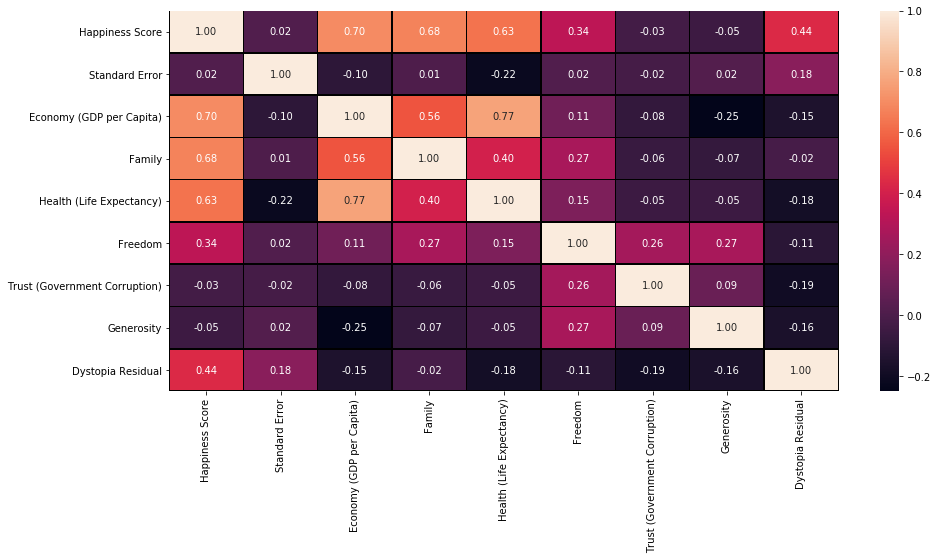

In [30]:
#correlation using heatmap:

import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black", fmt = '.2f')

Outcome of correlation: with happiness score
           
Standard Error               2%   -> Weak bond ;
Economy (GDP per Capita)     70%  -> Strong bond ;
Family                       68%  -> Strong bond ;
Health(Life Expectancy)      63%  -> Strong bond ;
Freedom                      34%  -> Good bond ;
Trust (Government Corruption)3%   -> Weak bond ;
Generosity                   5%   -> Weak bond ;
Dystopia Residual            44%  -> Strong bond 


Max Correlation: Economy (GDP per Capita)70% ;   
Min Correlation: Standard Error 2% , Generosity 5% , Trust (Government Corruption)3% .


# Multicollinearity

In [31]:
#If any 2 features tell same story, we will eliminate one feature which has got less importance in contributing to the label.
#Before checking for the multicollinearity (feature vs feature), we should scale our data.
 
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled.shape

(127, 8)

In [32]:
x_scaled.shape[1]

8

In [33]:
x_scaled

array([[-0.25556139,  0.87424002,  1.0559726 , ...,  1.48192264,
         0.08670589,  0.61005261],
       [ 0.03248395,  0.48620211,  1.17433786, ..., -0.67693056,
        -0.30791281,  1.6223423 ],
       [-0.80802334,  0.61719373,  1.26840948, ..., -0.8916164 ,
         2.89119797,  0.60633172],
       ...,
       [ 0.01223076, -0.20662391, -1.72156206, ...,  0.85419148,
         2.03892269, -3.15397648],
       [ 2.06174085, -1.96411963, -1.94489702, ..., -0.12805452,
        -0.19977799, -0.31242577],
       [ 0.97538236, -1.43955639, -2.98899364, ..., -0.05375301,
        -0.44817819, -0.81438698]])

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif

,vif,features
0,1.096304,Standard Error
1,3.369763,Economy (GDP per Capita)
2,1.582680,Family
3,2.693011,Health (Life Expectancy)
4,1.292405,Freedom
5,1.136584,Trust (Government Corruption)
6,1.272895,Generosity
7,1.153219,Dystopia Residual


most of the times if vif>5 we can think of eliminating feature.
Outcome: No Multicollinearity.

# Data Cleaning

Lets delete the features that have very weak correlation with the label. Setting Correlation threshold as +/-0.1.

In [35]:
delete = pd.DataFrame( [["0.015903", "Standard Error"], ["-0.046821", "Generosity "], ["-0.025912", "Trust (Government Corruption)"]] ,
                      columns = ["Correlation with Target","Column Name"])
delete

,Correlation with Target,Column Name
0,0.015903,Standard Error
1,-0.046821,Generosity
2,-0.025912,Trust (Government Corruption)


In [36]:
df = df.drop(["Standard Error", "Generosity", "Trust (Government Corruption)"], axis=1)
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
31,6.485,1.06166,1.20890,0.81160,0.60362,2.32142
32,6.477,0.91861,1.24018,0.69077,0.53466,2.85737
33,6.455,0.96690,1.26504,0.73850,0.55664,2.31945
34,6.411,1.39541,1.08393,0.72025,0.31048,2.43872
35,6.329,1.23011,1.31379,0.95562,0.45951,2.12367
...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,1.83302


# Dividing data to features and label once again after data cleaning


In [37]:
x = df.iloc[:, 1:]
y = df.iloc[:,:1]

x


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
31,1.06166,1.20890,0.81160,0.60362,2.32142
32,0.91861,1.24018,0.69077,0.53466,2.85737
33,0.96690,1.26504,0.73850,0.55664,2.31945
34,1.39541,1.08393,0.72025,0.31048,2.43872
35,1.23011,1.31379,0.95562,0.45951,2.12367
...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.67042
154,0.28665,0.35386,0.31910,0.48450,1.63328
155,0.66320,0.47489,0.72193,0.15684,0.32858
156,0.01530,0.41587,0.22396,0.11850,1.83302


In [38]:
y

,Happiness Score
31,6.485
32,6.477
33,6.455
34,6.411
35,6.329
...,...
153,3.465
154,3.340
155,3.006
156,2.905


# Power transform-Transforming data to remove if any skewness is still present:


In [39]:

from sklearn.preprocessing import power_transform
x = power_transform(x,method = 'yeo-johnson')
x

array([[ 0.87322927,  1.20826132,  1.05834668,  1.63431054,  0.59071828],
       [ 0.46544539,  1.39058748,  0.43858569,  1.04645589,  1.71672714],
       [ 0.60211728,  1.53982051,  0.6760289 ,  1.23013836,  0.58673733],
       [ 1.85730858,  0.5381967 ,  0.58411219, -0.63390055,  0.82988354],
       [ 1.36438675,  1.843827  ,  1.87912423,  0.44425379,  0.19708676],
       [ 1.29750029,  1.76909694,  1.47794556,  1.63457369, -0.69701981],
       [ 1.54466847,  0.49956402,  1.41020295, -0.02364588,  0.59437695],
       [ 2.3405957 ,  0.96754861,  0.60749942,  1.21623024, -0.27783308],
       [ 0.68308267,  0.01295951,  0.05016301,  1.57264942,  1.57261279],
       [ 1.31053159,  1.06482359,  0.08031766,  1.24871272,  0.48483307],
       [ 0.03635245,  0.25351661,  0.37363574,  0.02112461,  2.10820442],
       [-0.01583598,  0.34088694,  0.21629492,  1.40618778,  1.46842947],
       [-0.32274147,  2.01644096,  0.00286287,  2.12391616,  0.42201011],
       [ 1.18460914,  1.56999826,  0.9

# Scaling:

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)
x

array([[ 0.87322927,  1.20826132,  1.05834668,  1.63431054,  0.59071828],
       [ 0.46544539,  1.39058748,  0.43858569,  1.04645589,  1.71672714],
       [ 0.60211728,  1.53982051,  0.6760289 ,  1.23013836,  0.58673733],
       [ 1.85730858,  0.5381967 ,  0.58411219, -0.63390055,  0.82988354],
       [ 1.36438675,  1.843827  ,  1.87912423,  0.44425379,  0.19708676],
       [ 1.29750029,  1.76909694,  1.47794556,  1.63457369, -0.69701981],
       [ 1.54466847,  0.49956402,  1.41020295, -0.02364588,  0.59437695],
       [ 2.3405957 ,  0.96754861,  0.60749942,  1.21623024, -0.27783308],
       [ 0.68308267,  0.01295951,  0.05016301,  1.57264942,  1.57261279],
       [ 1.31053159,  1.06482359,  0.08031766,  1.24871272,  0.48483307],
       [ 0.03635245,  0.25351661,  0.37363574,  0.02112461,  2.10820442],
       [-0.01583598,  0.34088694,  0.21629492,  1.40618778,  1.46842947],
       [-0.32274147,  2.01644096,  0.00286287,  2.12391616,  0.42201011],
       [ 1.18460914,  1.56999826,  0.9

# Train-Test-Split:

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20 , random_state = 50)
y_train.head()

,Happiness Score
70,5.477
104,4.788
85,5.124
117,4.550
108,4.694


# Model Training

In [42]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Since my model is now trained
Lets predict with our model and compare with the actual

In [43]:
df.tail()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
153,3.465,0.22208,0.77370,0.42864,0.59201,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,1.83302
157,2.839,0.20868,0.13995,0.28443,0.36453,1.56726


Since this is the actual dataframe, we will pick one row  , convert the x features into scaled data and predict the happiness score , and compare with the actual happiness score of that row data. to check how good is our model.

In [44]:

print('Happiness Score is:', regression.predict(sc.fit_transform([[0.01530,0.41587,0.22396,0.11850,1.83302]])))

Happiness Score is: [[4.94721587]]


the actual Happiness Score for the above data is: 2.905

# Saving the model

In [45]:
import pickle
filename = 'finalized_happiness_model.pickle'
pickle.dump(regression, open(filename, 'wb'))  #our model 'regression' will be named as this 'filename'

# Prediction using saved model

In [46]:
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict(sc.fit_transform([[0.20868,0.13995,0.28443,0.36453,1.56726]]))
a

array([[4.94721587]])

# Adjusted R^2 value:

By looking at the adjusted R^2 value we can judge whether the data in the regression equation is a good fit.

In [47]:
#Our linear regression training score

regression.score(x_train,y_train)

0.975762648551706

In [48]:
#Our linear regression testing score, how well our model fits the test data

regression.score(x_test,y_test)

0.944773210800703

Outcome: Our 'regression', Training score is 97% , Testing score is 94%

# Comparing y_pred with y_test to check the model performance

In [49]:
#lets plot and visualize
y_pred = regression.predict(x_test)         #We make prediction for the x_test data, and compare the obtained pred_values 
                                            #with the actual y_test values to check our model performance
y_pred    

array([[5.21374897],
       [5.63862692],
       [5.93077707],
       [4.59601329],
       [3.69745978],
       [5.95893151],
       [3.89390788],
       [3.19798382],
       [5.82487543],
       [3.71464493],
       [5.0061819 ],
       [6.10263855],
       [5.3304407 ],
       [3.28800328],
       [4.85349856],
       [4.47819018],
       [6.13983121],
       [4.01673651],
       [5.35596223],
       [6.23465065],
       [5.75395942],
       [4.59930061],
       [5.33559796],
       [5.99502161],
       [5.71952305],
       [5.13590951]])

In [50]:
y_test    #y_test has 20% of our data which corresponds to x_test , since we splitted our data with test_size= .20

,Happiness Score
75,5.332
65,5.695
43,6.003
115,4.571
128,4.307
47,5.975
141,3.904
157,2.839
52,5.878
148,3.667


#Since we have y_pred values , lets plot with y_test

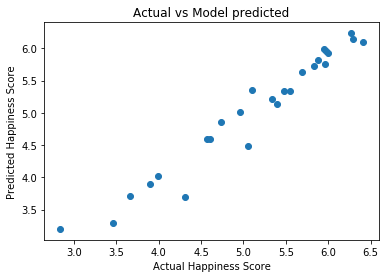

In [51]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Model predicted')
plt.show()

We can visualize that the graph is fairly linear. Lets analyze with some samples 
For actual=4.0 predicted is also around 4.0, for actual=5.5 ,
predicted is around 5.2, for actual=5.1 , the predicted is 4.5..so on. 

Overall our model is working good.

# Model Evaluation

In [52]:
#model evaluation metrics represent error of our linear regression model:
#Mean Absolute Error
#Mean Squared Error
#Root Mean Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = regression.predict(x_test)
mean_absolute_error(y_test,y_pred)  #represents the average error
print("MAE=", mean_absolute_error(y_test,y_pred))

MAE= 0.15598731452320153


In [53]:
mean_squared_error(y_test,y_pred)
print("MSE=", mean_squared_error(y_test,y_pred))

MSE= 0.04952480163948086


In [54]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE=",RMSE)

RMSE= 0.22254168517264547


We want our scores to be high
and evaluation metrics MAE,MSE,RMSE to be low

Our 'regression' model,
1)Testing score is 94%. Which is pretty good.
2)MAE= 0.1559 , MSE= 0.0495 , RMSE= 0.2225 , which is also fine.

# Regularization- to check if our model is overfitting

Regularization helps to reduce the variance of our model, without a substantial increase in the bias.If there is variance 
in the model that means the model wont fit well for a different dataset than training data.The tuning parameter controls 
this bias and variance tradeoff. The value of tuning parameter is selected using CV cross validation methods. A set of 
tuning parameter is selected and CV error is calculated for each value of tuning parameter, and that value is selected 
for which the CV error is minimum.



In [55]:
from sklearn.linear_model import Lasso,LassoCV

lassCV = LassoCV(alphas=None, max_iter=100, normalize=True)
lassCV.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=100, n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [56]:
#the best learning rate alpha

alpha = lassCV.alpha_
print("alpha=", alpha)

alpha= 0.00021278081480681973


If we use this learning rate, the regression model learns at abest possible rate. Now that we have best learning parameter,
lets use Lasso regression and see how well our data is fitted before.

In [57]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00021278081480681973, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
lasso_reg.score(x_test,y_test)

0.9447452890557144

# Conclusion

Our Lasso model gave 94.4% with best possible learning rate.
Earlier, our model 'regression' also gave 94.4% testing score.
=> Our Linear Regression model is not overfitting.